**Objective:** Detect consumer patterns and statistically significant differences between customer segments or products using descriptive and inferential statistics.

In [4]:
# 📌 Mount Google Drive to access the dataset
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
#Load the walmart sales Dataset from drive
wal_data="/content/drive/MyDrive/ml_engineer/p4_Consumer_demand_Walmart/walmart.csv"
df=pd.read_csv(wal_data)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 🧠 Project: Walmart Sales Behavior Analysis  
**Dataset:** Walmart eCommerce Sales  
**Objective:** Understand customer behavior and purchasing patterns across demographics and product categories using statistical analysis and data visualization.

---

## 📌 Project Structure – APPASA Framework

### 🔍 1. Ask – Define the problem
- What patterns exist in customer purchases?
- Do demographics (gender, age, city) affect buying behavior?
- Which product categories are more profitable?
- Can we find segments with statistically different purchase behaviors?

---

### 📥 2. Prepare – Understand the data
- Load the dataset from Google Drive
- Review structure, columns, and types
- Check for missing values and duplicates

---

### 🧼 3. Process – Clean the data
- Handle missing values
- Convert categorical variables if needed
- Standardize or rename columns for clarity

---

### 📊 4. Analyze – Perform statistical analysis
- Descriptive statistics (mean, std, distribution)
- Compare groups (gender, city, product category)
- Test hypotheses: Are purchase amounts significantly different across groups?

---

### 📈 5. Share – Visualize & interpret
- Create bar plots, boxplots, histograms
- Add labels and explanations
- Highlight interesting insights clearly

---

### ✅ 6. Act – Propose actions
- Identify customer segments worth targeting
- Recommend focus areas for promotions
- Suggest product categories for retention or upselling


## 🔍 1. Ask – Define the Problem

The goal of this project is to understand purchasing behaviors from Walmart's eCommerce data. We aim to analyze how different demographic groups (such as gender, age, and city category) influence purchase amounts and product preferences.

This analysis will help Walmart's marketing and product teams answer key business questions like:

- Which product categories generate the highest revenue?
- Are there significant differences in purchasing behavior by gender or age group?
- Does the number of years living in the same city affect spending?
- Can we identify customer segments that are more likely to spend more?

These insights will be used to inform marketing strategies, pricing, and product targeting efforts.


In [5]:
#Prepare
# 📊 Check the shape of the dataset: (rows, columns)
print("shape of the dataset", df.shape)

# 📋 View data types and non-null counts per column
df.info()

# 🔎 Check for missing values in each column
df.isnull().sum()
# 🧬 Check for duplicate rows (just in case)
df.duplicated().sum()
# 📉 Descriptive stats for numerical columns
df.describe()

shape of the dataset (550068, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


💡 *Note: The dataset does not specify the currency for the `Purchase` column. Based on the context (Walmart, US-based retailer), we assume that values are in USD.*

## 📥 2. Prepare – Dataset Overview and Structure

The dataset contains **550,068 records** and **10 columns**. No missing values or duplicate rows were found, which indicates the dataset is clean and ready for analysis.

### 🔧 Column Summary:

| Column                        | Type     | Description |
|------------------------------|----------|-------------|
| `User_ID`                    | int64    | Unique ID for each customer |
| `Product_ID`                 | object   | Unique ID for each product |
| `Gender`                     | object   | Customer gender (M/F) |
| `Age`                        | object   | Age group (e.g., 18-25, 26-35) |
| `Occupation`                | int64    | Coded profession of the customer |
| `City_Category`              | object   | City type: A, B, or C |
| `Stay_In_Current_City_Years`| object   | Number of years the customer has lived in the current city |
| `Marital_Status`             | int64    | 0 = Single, 1 = Married |
| `Product_Category`           | int64    | Category ID of the purchased product |
| `Purchase`                   | int64    | Amount spent on the purchase (target variable) |

### 📊 Key Statistics:

- 🧑‍🤝‍🧑 **Average Purchase**: 9,263 USD
- 📈 **Max Purchase**: 23,961 USD  
- 🔻 **Min Purchase**: 12 USD  
- 🎯 **Most Common Product Categories** range between 1 and 8, with a max of 20  
- 👔 **Occupations** range from 0 to 20  
- 💍 **Marital Status** is binary: 0 (Single), 1 (Married)

These insights will help us segment users, compare groups, and identify patterns in future steps.



## 🧼 3. Process – Data Cleaning

The dataset is relatively clean: it has no missing values or duplicate rows. However, a few adjustments are necessary before analysis:

- Convert `Stay_In_Current_City_Years` from object to integer (handle "4+" as 4)
- Check the distribution of categorical variables (`Gender`, `Age`, `City_Category`)
- Optionally convert certain object columns to category type for optimization


In [6]:
# 🔧 Convert 'Stay_In_Current_City_Years' to integer (replace '4+' with 4)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

# 🧠 Convert categorical columns to 'category' dtype (saves memory)
cat_cols = ['Gender', 'Age', 'City_Category', 'Product_ID']
for col in cat_cols:
    df[col] = df[col].astype('category')

# ✅ Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  int64   
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int64(6)
memory usage: 28.0 MB


## 📊 4. Analyze – Descriptive Analysis and Group Comparisons

In this stage, we explore the dataset using descriptive statistics and visualizations to identify patterns in purchasing behavior.

We aim to answer the following questions:

- Do men and women spend differently?
- Are there age groups that spend more on average?
- Do city categories show variation in purchase behavior?
- Which product categories generate higher purchase amounts?

To answer these, we will use:
- `groupby()` operations to calculate averages per category
- bar plots and box plots to visualize comparisons
- statistical summaries to support business insights

### 🔎 Example insights to explore:
- 🧑‍🤝‍🧑 Average Purchase by Gender
- 🧓 Average Purchase by Age Group
- 🌆 Average Purchase by City Category
- 🛍️ Top Product Categories by Revenue



<ipython-input-7-180ac1bee7cc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_avg = df.groupby('Gender')['Purchase'].mean().round(0)
<ipython-input-7-180ac1bee7cc>:19: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


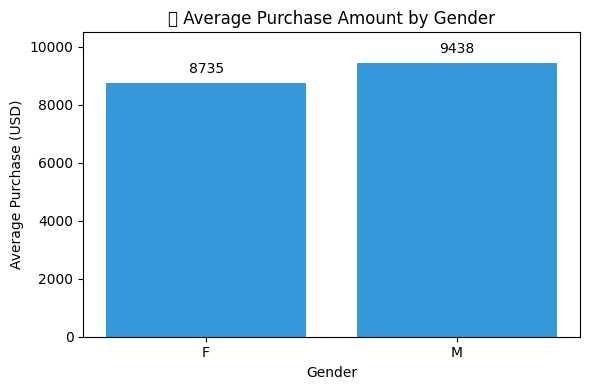

In [7]:
#Insight 1 Average Purchase by Gender
# 📊 Calculate average purchase amount by gender
gender_avg = df.groupby('Gender')['Purchase'].mean().round(0)
#Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# 📈 Bar plot showing average purchase by gender
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_avg.index, gender_avg.values, color='#3498db')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 250,  # 👈 +250 para dar espacio
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 10500)  # 👈 Eleva el límite superior del eje Y
plt.xlabel('Gender')
plt.ylabel('Average Purchase (USD)')
plt.title('🛍️ Average Purchase Amount by Gender')
plt.tight_layout()
plt.show()


### 🧠 Insight: Average Purchase by Gender

We analyzed the average purchase amount made by each gender. The bar chart reveals that:

- 🧑‍🦰 **Male customers** tend to spend slightly more than female customers.
- 👩 **Female customers**, however, show only a marginally lower average purchase value.

This suggests that gender does not lead to strong differences in spending behavior in this dataset, although there may be subtle patterns worth further exploration. We could complement this analysis with frequency or product category trends by gender in the next steps.


<ipython-input-19-78d200a696ae>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_avg = df.groupby('City_Category')['Purchase'].mean().round(0)
<ipython-input-19-78d200a696ae>:19: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


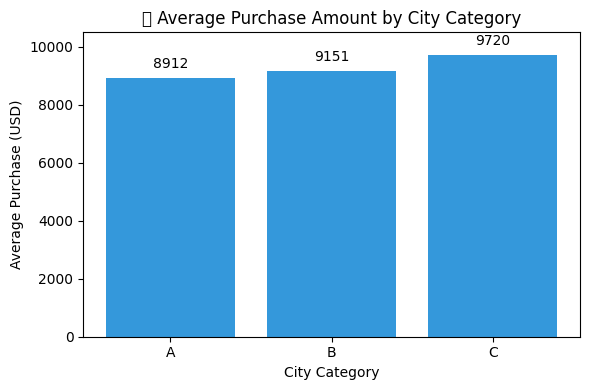

In [19]:
#Insight 1 Average Purchase by Gender
# 📊 Calculate average purchase amount by gender
gender_avg = df.groupby('City_Category')['Purchase'].mean().round(0)
#Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# 📈 Bar plot showing average purchase by gender
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_avg.index, gender_avg.values, color='#3498db')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 250,  # 👈 +250 para dar espacio
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 10500)  # 👈 Eleva el límite superior del eje Y
plt.xlabel('City Category')
plt.ylabel('Average Purchase (USD)')
plt.title('🛍️ Average Purchase Amount by City Category')
plt.tight_layout()
plt.show()

### 🏙️ Average Purchase by City Category

- Customers in **City Category C** have the highest average purchase **9720 USD** , followed by Category B **9151 USD** and A **8912 USD**
- The difference, however, is not drastically wide.
- This suggests that **city category has a limited impact** on purchase behavior in this dataset.


<ipython-input-20-7f9b176f5f7d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_avg = df.groupby('Age')['Purchase'].mean().round(0)
<ipython-input-20-7f9b176f5f7d>:19: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


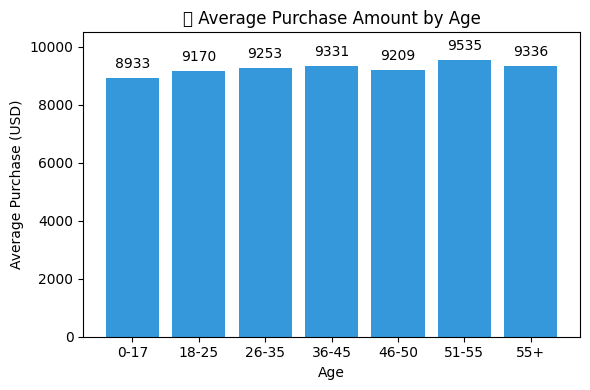

In [20]:
#Insight 1 Average Purchase by Gender
# 📊 Calculate average purchase amount by gender
gender_avg = df.groupby('Age')['Purchase'].mean().round(0)
#Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# 📈 Bar plot showing average purchase by gender
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_avg.index, gender_avg.values, color='#3498db')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 250,  # 👈 +250 para dar espacio
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 10500)  # 👈 Eleva el límite superior del eje Y
plt.xlabel('Age')
plt.ylabel('Average Purchase (USD)')
plt.title('🛍️ Average Purchase Amount by Age')
plt.tight_layout()
plt.show()

### 🧓 Average Purchase Amount by Age Group

- The age group **51–55** shows the highest average purchase 9535 USD, closely followed by **36–45** and **55+**.
- Younger customers (especially **0–17**) tend to spend less on average 8933 USD.
- However, overall differences across age groups are not extreme.
- This suggests that **age has a moderate influence** on purchasing behavior, with middle-aged adults being slightly more valuable customers.


<ipython-input-8-aec744491dc8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
<ipython-input-8-aec744491dc8>:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


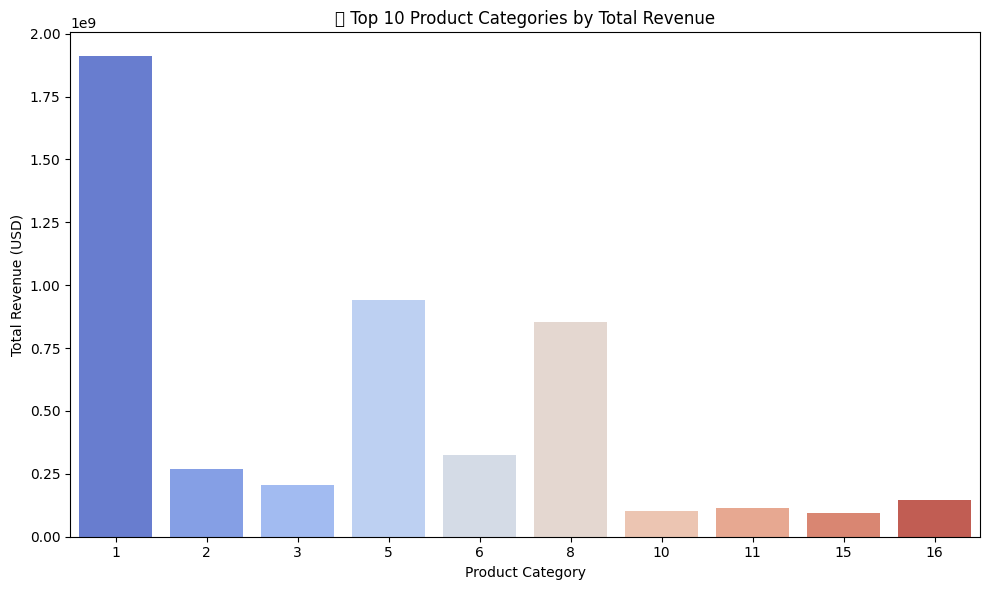

In [8]:
#Top products

# 🏷️ Agrupar por categoría y calcular ingresos totales
top_products = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False).head(10)

# 🔧 Corregir el índice para que se vea como entero (no float)
top_products.index = top_products.index.astype(int)

# 📊 Visualización limpia y legible
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title('💰 Top 10 Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📦 Top 10 Product Categories by Total Revenue

To identify which product categories drive the highest revenue, we aggregated the total purchase amount per category and visualized the top 10.

#### 🔍 Insight
- **Product Category 1** is the clear leader in revenue generation, significantly outperforming all other categories.
- **Categories 5 and 8** also contribute substantially, but with a notable gap compared to Category 1.
- Other categories in the top 10 have relatively low revenue in comparison, indicating they may require targeted marketing efforts or strategic reconsideration.

#### 📊 Business Implication
Focusing on best-selling categories like 1, 5, and 8 could help optimize inventory, marketing investment, and promotional campaigns to boost profitability.


## 📢 SHARE — Key Insights from EDA

After analyzing the Walmart sales dataset, several key patterns emerged across customer demographics and product categories:

### 🧍‍♂️🧍‍♀️ Gender
- **Men spent more on average** than women, with an average purchase of $9,438 vs. $8,735.
- However, the gap is not substantial, indicating balanced purchasing power between genders.

### 🧠 Age Groups
- **Customers aged 51–55** had the highest average purchase (~$9,535), followed closely by those 55+.
- Younger customers (under 18) spent the least, suggesting age is positively correlated with spending.

### 🏙️ City Category
- Customers from **City C** showed the highest average spending ($9,720), followed by B and A.
- This may reflect regional purchasing power or targeted marketing effectiveness.

### 🛒 Product Categories
- **Product Category 1** generated the highest total revenue, far exceeding other categories.
- Categories 5 and 8 also contributed significantly, indicating high-volume or high-value products.

### 🔁 Other Notable Patterns
- No missing values in critical columns, and data types are appropriate after preprocessing.
- Categorical features like `Gender`, `Age`, and `City_Category` are strong candidates for segmentation and predictive modeling.

This analysis provides a clear foundation for understanding consumer behavior and optimizing marketing strategies.


## 🎯 ACT — Strategic Recommendations Based on Analysis

Based on the insights obtained through exploratory data analysis, here are actionable steps Walmart could consider to enhance performance and drive sales:

### 🧑‍🤝‍🧑 1. Target High-Value Demographics
- **Focus on customers aged 51–55 and 55+**, who exhibit the highest average spending.
- Tailor loyalty programs, promotions, and advertising toward these age segments to increase retention and lifetime value.

### 🏙️ 2. Expand in City Category C
- **City C customers have the highest purchasing average**. Invest in expanding product availability, delivery infrastructure, and localized marketing in this region.

### 🛒 3. Promote Best-Selling Product Categories
- **Category 1** dominates in revenue. Highlight top-selling products through upselling, cross-selling, and seasonal bundles.
- Monitor performance in Categories 5 and 8 as additional revenue drivers.

### 📦 4. Inventory Optimization
- Align stock and supply chain priorities with high-revenue product categories and cities that show stronger consumer demand.

### 🧠 5. Build Predictive Models
- Use machine learning to predict future purchases and personalized offers.
- Features like **age, city category, product category, and time in city** may be relevant for building recommendation systems or customer segmentation models.

By translating data into strategic action, Walmart can refine customer experience, increase operational efficiency, and improve revenue performance across segments.
